**Salary Data Linear Regression**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as  smf
import warnings
warnings.filterwarnings('ignore')

In [3]:
salary=pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

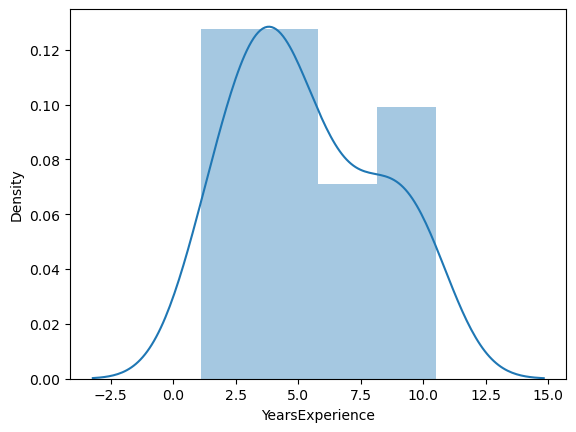

In [10]:
sns.distplot(salary['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

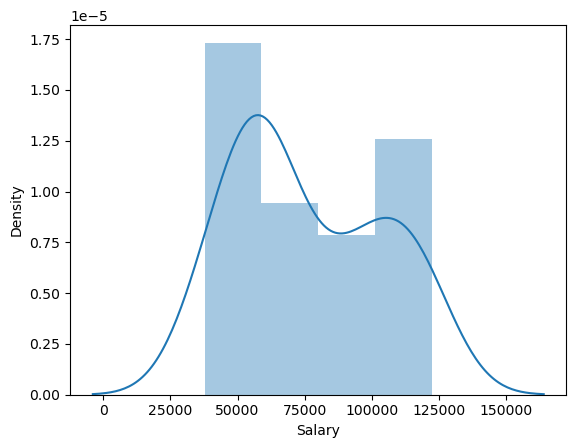

In [11]:
sns.distplot(salary['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

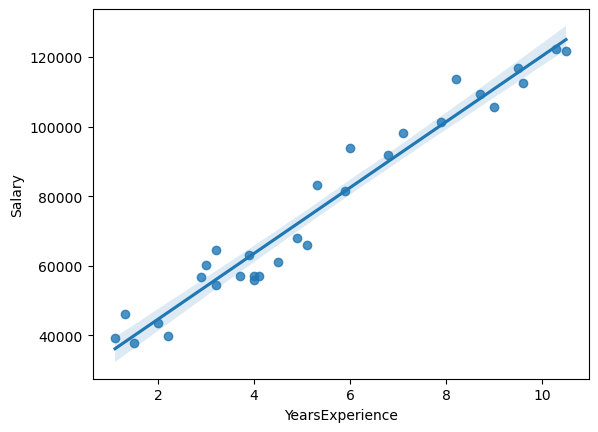

In [12]:
sns.regplot(x=salary['YearsExperience'],y=salary['Salary'])

In [13]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
model=smf.ols("Salary~YearsExperience",data=salary).fit()

In [15]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [16]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [17]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [18]:
#predict salary for 10 years experience
salary_10=(25792.200199) + (9449.962321)*(10)
salary_10

120291.823409

In [19]:
#automatic prediction
new_salary=pd.Series([10,12,15,18,20,25])
new_salary

0    10
1    12
2    15
3    18
4    20
5    25
dtype: int64

In [20]:
salary_predict=pd.DataFrame(new_salary,columns=["YearsExperience"])
salary_predict

,YearsExperience
0,10
1,12
2,15
3,18
4,20
5,25


In [21]:
model.predict(salary_predict)

0    120291.823413
1    139191.748056
2    167541.635020
3    195891.521985
4    214791.446628
5    262041.258235
dtype: float64

**Delivery Time Data Linear regression**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [24]:
delivery=pd.read_csv('delivery_time.csv')
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
delivery=delivery.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [26]:
delivery.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [27]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [41]:
delivery.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

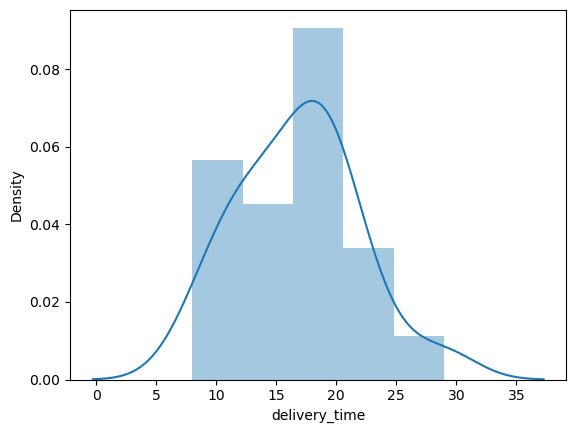

In [29]:
# Data distribution
sns.distplot(delivery['delivery_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

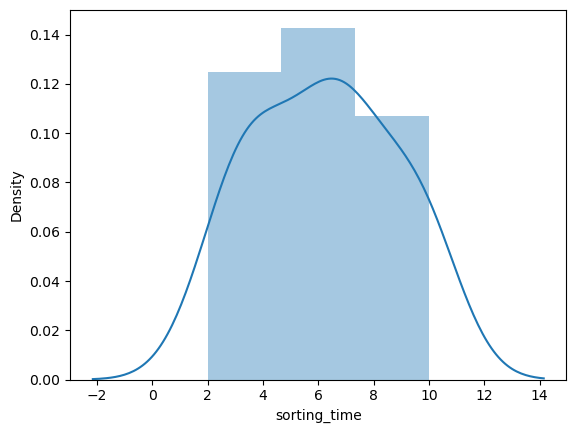

In [30]:
sns.distplot(delivery['sorting_time'])

In [28]:
delivery.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

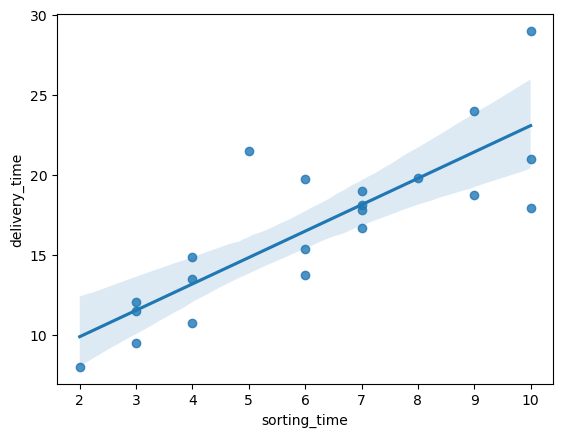

In [34]:
#Correlation analysis
sns.regplot(x=delivery['sorting_time'],y=delivery['delivery_time'])

In [35]:
model_delivery=smf.ols("delivery_time~sorting_time",data=delivery).fit()

In [36]:
model_delivery.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [42]:
#Print values for t value and p value
print(f"t value is\n{model.tvalues}\nP value is\n{model.pvalues}")

t value is
Intercept          11.346940
YearsExperience    24.950094
dtype: float64
P value is
Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [43]:
model_delivery.pvalues,model_delivery.tvalues

(Intercept       0.001147
 sorting_time    0.000004
 dtype: float64,
 Intercept       3.823349
 sorting_time    6.387447
 dtype: float64)

In [44]:
new_delivery=pd.Series([15,20,25,40,45,60])
new_delivery

0    15
1    20
2    25
3    40
4    45
5    60
dtype: int64

In [45]:
predict_delivery=pd.DataFrame(new_delivery,columns=['sorting_time'])
predict_delivery

,sorting_time
0,15
1,20
2,25
3,40
4,45
5,60


In [40]:
model_delivery.predict(predict_delivery)

0     31.318032
1     39.563132
2     47.808231
3     72.543530
4     80.788629
5    105.523928
dtype: float64